<h1 style= "font-size: 3rem; color:black;"> Movie Recommendation System </h1>

In [5]:
#importing Libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

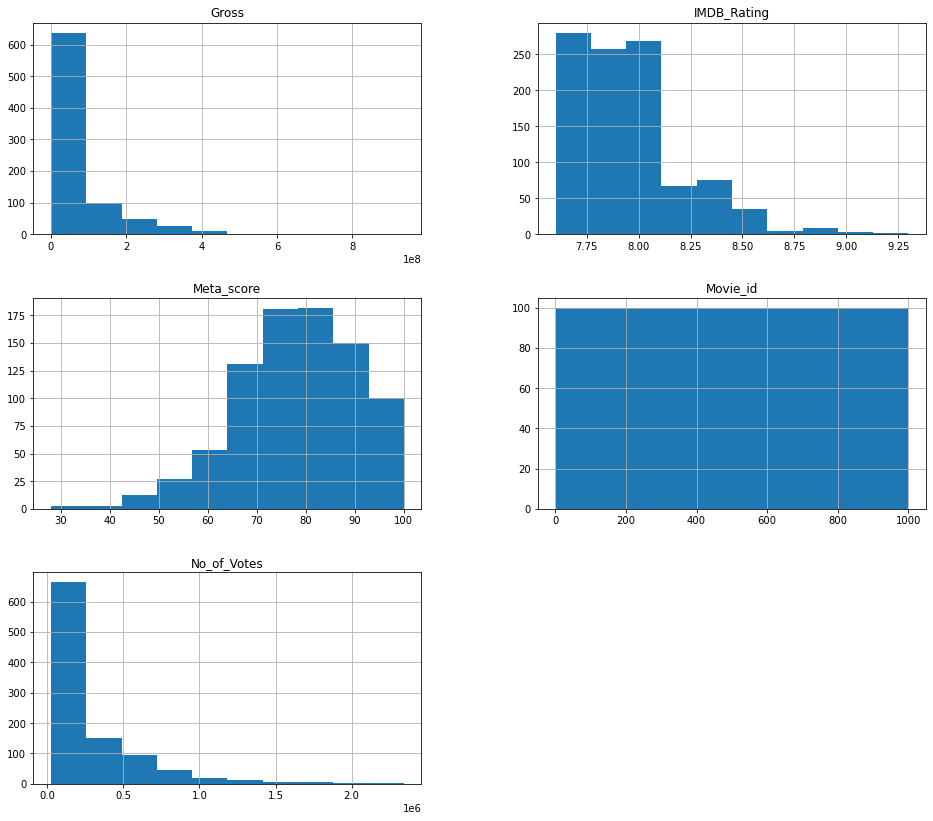

In [6]:
#load dataset
df = pd.read_csv("top_1000_movies.csv")
df.hist(figsize=(16,14))
plt.show()

<BarContainer object of 21 artists>

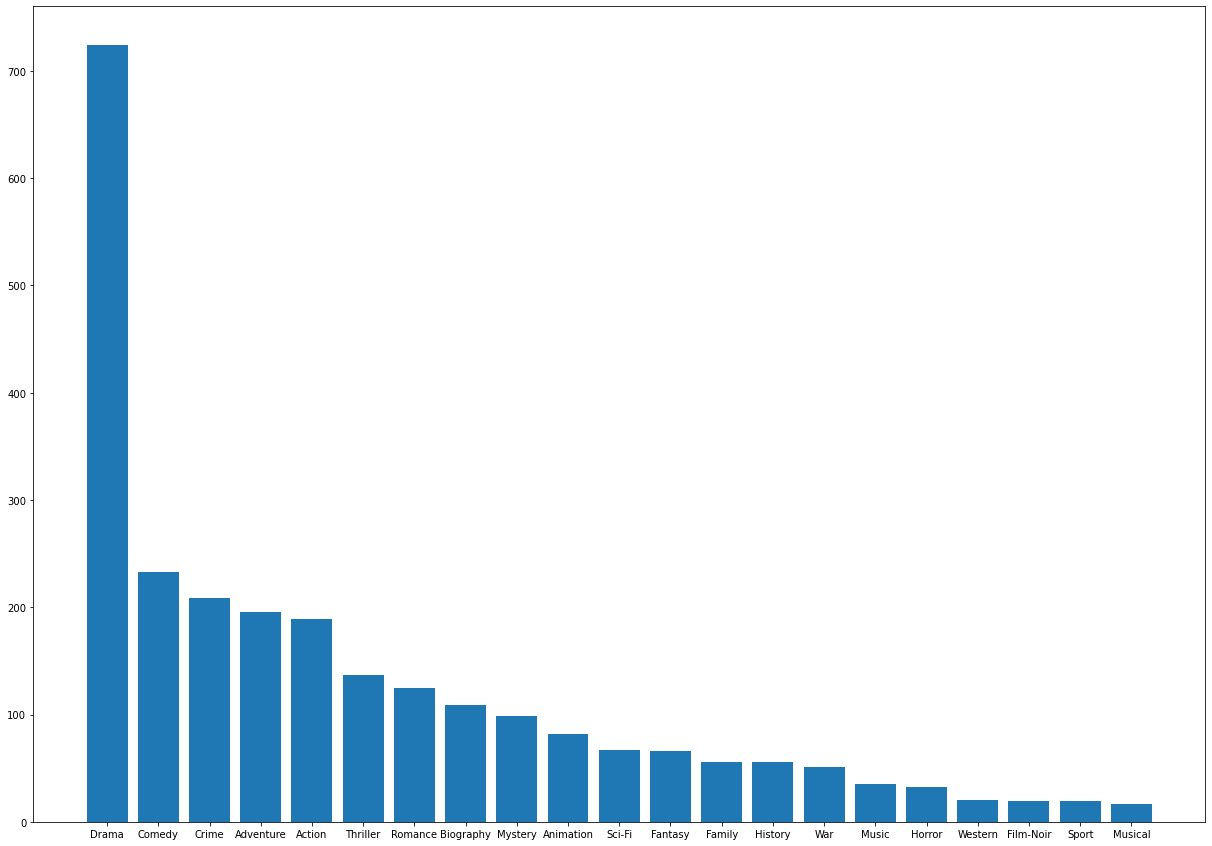

In [7]:
dummy = df['Genre'].str.get_dummies(sep=', ')
genre_distribution = dummy.sum().sort_values(ascending=False).index.values
genre_count = dummy.sum().sort_values(ascending=False).values
plt.figure(figsize=(21,15))
plt.bar(genre_distribution, genre_count)

Text(0.5, 1.0, 'Top 10 Directors Gross Earnings')

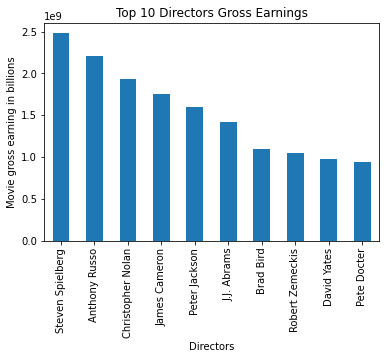

In [10]:
# director_distribution = df['Director'].value_counts()
# print(director_distribution)
# director_distribution[1][1]
gross_by_director = df['Gross'].groupby(df['Director']).sum().sort_values(ascending=False).head(10)
gross_by_director.plot.bar()
plt.xlabel("Directors")
plt.ylabel("Movie gross earning in billions")
plt.title('Top 10 Directors Gross Earnings')

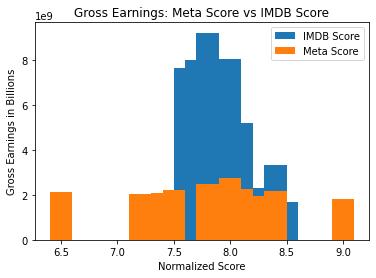

In [11]:
gross_by_imdb_key = df['Gross'].groupby(df['IMDB_Rating']).sum().sort_values(ascending=False).head(10).index.values
gross_by_meta_key = df['Gross'].groupby(df['Meta_score']).sum().sort_values(ascending=False).head(10).index.values
gross_by_imdb = df['Gross'].groupby(df['IMDB_Rating']).sum().sort_values(ascending=False).head(10).values
gross_by_meta = df['Gross'].groupby(df['Meta_score']).sum().sort_values(ascending=False).head(10).values


bar_width = 0.2
fig, ax = plt.subplots()
summer = ax.bar(gross_by_imdb_key, gross_by_imdb, bar_width,label="IMDB Score")

Winter = ax.bar(gross_by_meta_key/10, gross_by_meta, bar_width,label="Meta Score")
ax.set_xlabel('Normalized Score')
ax.set_ylabel('Gross Earnings in Billions')
ax.set_title('Gross Earnings: Meta Score vs IMDB Score')
ax.legend()

In [12]:
columns = ['Movie_id', 'Series_Title', 'Genre', 'IMDB_Rating','Director', 'Star1', 'Star2', 'Star3', 'Star4']

In [13]:
def get_important_features(data):
    important_features = []
    for i in range(0, data.shape[0]):
        important_features.append(data['Series_Title'][i] + ' ' + data['Genre'][i] + ' ' + str(data['IMDB_Rating'][i])  + ' ' 
                                  + data['Director'][i] + ' ' + data['Star1'][i]+ ' ' + data['Star2'][i]+ ' ' 
                                  + data['Star3'][i]+ ' ' + data['Star4'][i])
    return important_features

In [22]:
def movie_rec(df, movie_name):
    df['important_features'] = get_important_features(df)
    cm = CountVectorizer().fit_transform(df['important_features'])
    cs = cosine_similarity(cm)
    movie_id = df[df.Series_Title == movie_name]['Movie_id'].values[0]
    scores = list(enumerate(cs[movie_id]))
    sorted_scores = sorted(scores, key = lambda x:x[1], reverse = True)
    sorted_scores = sorted_scores[1:]
    
    j = 0
    print('The top 7 most similar movies are listed below', movie_name, 'are:\n')

    for items in sorted_scores:
        movie_title = df[df.Movie_id == items[0]]['Series_Title'].values[0]
        print(j+1, movie_title)
        j = j+1
        if j > 6:
            break

In [23]:
movie_rec(df, 'The Dark Knight')

The top 7 most similar movies are listed below The Dark Knight are:

1 Home Alone
2 The Shawshank Redemption
3 The Fugitive
4 Amour
5 Eskiya
6 Crimes and Misdemeanors
7 The Shining


In [196]:
# df['important_features'] = get_important_features(df)

In [197]:
# #convert text to matrix of token counts
# cm = CountVectorizer().fit_transform(df['important_features'])

In [207]:
# cs = cosine_similarity(cm)

In [200]:
# test = 'The Machinist'

# movie_id = df[df.Series_Title == test]['Movie_id'].values[0]

In [201]:
# scores = list(enumerate(cs[movie_id]))

In [202]:
# sorted_scores = sorted(scores, key = lambda x:x[1], reverse = True)
# sorted_scores = sorted_scores[1:]

In [203]:
# j = 0
# print('The top 7 most similar movies are listed below', test, 'are:\n')

# for items in sorted_scores:
#     movie_title = df[df.Movie_id == items[0]]['Series_Title'].values[0]
#     print(j+1, movie_title)
#     j = j+1
#     if j > 6:
#         break

The top 7 most similar movies are listed below The Machinist are:

1 Coco
2 Efter brylluppet
3 Das Experiment
4 The Florida Project
5 Majo no takkyûbin
6 The Matrix
7 The Departed
